🔸 Logistic Regression
Accuracy: 0.97
AUC: 1.00
------------------------------
🔸 KNN
Accuracy: 0.95
AUC: 0.98
------------------------------
🔸 SVM
Accuracy: 0.97
AUC: 1.00
------------------------------
🔸 Decision Tree
Accuracy: 0.94
AUC: 0.93
------------------------------
🔸 Gradient Boosting
Accuracy: 0.96
AUC: 0.99
------------------------------


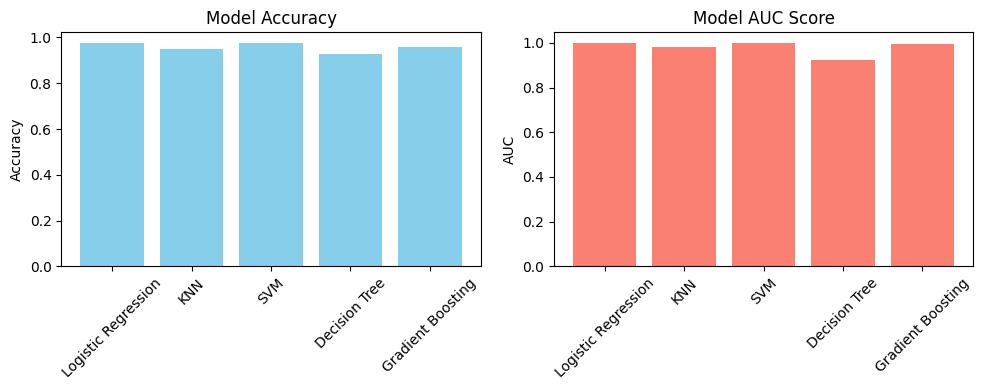

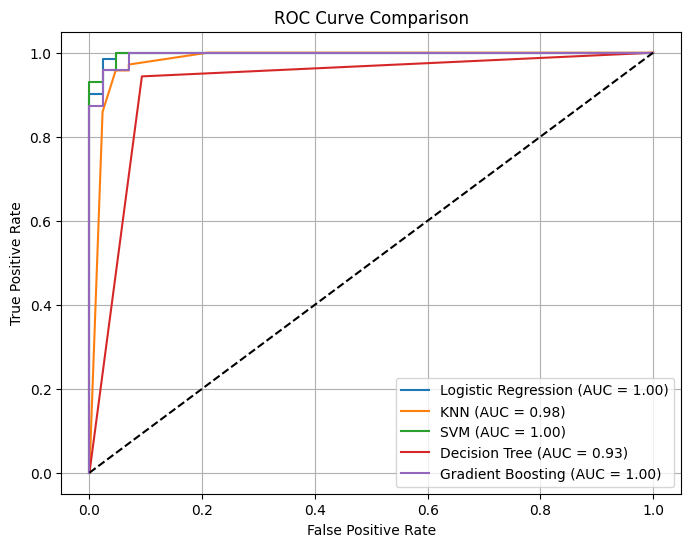

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

df = pd.concat([X, y], axis=1)
df.head()

# Scaling features means transforming your input features so that they are on a similar scale — typically with zero mean and unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    print(f"🔸 {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")
    print("-" * 30)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

accuracy_scores = {}
auc_scores = {}
roc_curves = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    accuracy_scores[name] = acc
    auc_scores[name] = auc_score
    roc_curves[name] = (fpr, tpr)

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Model Accuracy")

# Plot AUC
plt.subplot(1, 2, 2)
plt.bar(auc_scores.keys(), auc_scores.values(), color='salmon')
plt.ylabel("AUC")
plt.xticks(rotation=45)
plt.title("Model AUC Score")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_scores[name]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


Hyperparameter tuning
: GridSearchCV (with KNN)

Example Hyperparameters:


KNN:- n_neighbors, weights, metric

SVM (SVC):- C, kernel, gamma

LogisticRegression:- C, penalty, solver

RandomForestClassifier:- n_estimators, max_depth, min_samples_split

GradientBoostingClassifier:- learning_rate, n_estimators, max_depth

DecisionTreeClassifier:- max_depth, min_samples_split, criterion
